In [66]:
import pandas as pd
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [67]:
X, y = datasets.load_diabetes(as_frame=True, return_X_y=True)
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [68]:
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X.to_numpy())

In [69]:
X = X_pca
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

MSE = metrics.mean_squared_error(y, y_pred) # среднеквадратичная ошибка
RMSE = metrics.root_mean_squared_error(y, y_pred) # корень среднеквадратичной ошибки
MAE = metrics.mean_absolute_error(y, y_pred) # средняя абсолютная ошибка (между предсказанным и истинным значением)
MAPE = metrics.mean_absolute_percentage_error(y, y_pred) # средняя абсолютная ошибка в процентах
R2 = metrics.r2_score(y, y_pred)

print(f'MSE = {MSE}\nRMSE = {RMSE}\nMAE = {MAE}\nMAPE = {MAPE}\nR2 = {R2}')

MSE = 2882.817215228511
RMSE = 53.691872897380954
MAE = 43.43795340581988
MAPE = 0.3875275527590722
R2 = 0.5138493806632687


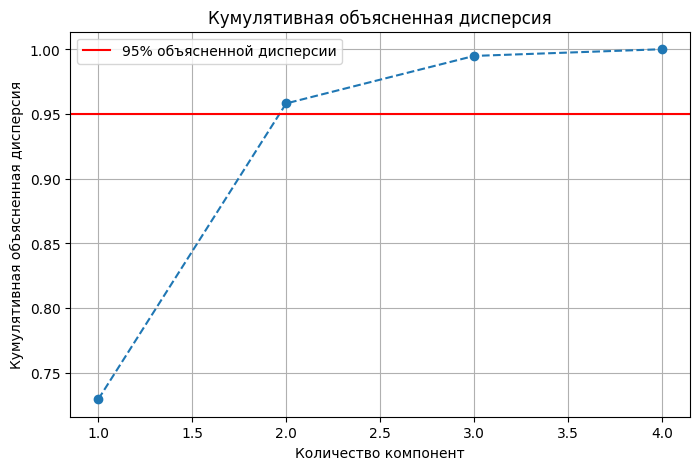

Объясненная дисперсия для каждой компоненты: [0.72962445 0.22850762 0.03668922 0.00517871]
Кумулятивная объясненная дисперсия: [0.72962445 0.95813207 0.99482129 1.        ]


In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Загрузим набор данных Iris в качестве примера
data = load_iris()
X = data.data
y = data.target

# Стандартизируем данные (важно для PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Применяем PCA
pca = PCA()  # По умолчанию все компоненты
X_pca = pca.fit_transform(X_scaled)

# Вычислим кумулятивную объясненную дисперсию
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Построим график
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Кумулятивная объясненная дисперсия')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% объясненной дисперсии')  # Линия для 95%
plt.legend()
plt.show()

# Выведем объясненную дисперсию для каждой компоненты
print("Объясненная дисперсия для каждой компоненты:", explained_variance_ratio)
print("Кумулятивная объясненная дисперсия:", cumulative_explained_variance)